In [1]:
%matplotlib inline
from scipy.stats import norm
import numpy as np
import matplotlib.pylab as plt

In [2]:
def gaussienne(x,mu,sigma,k):

    return (k/(sigma*((2*np.pi)**0.5)))*np.exp(-((x-mu)**2)/(2*(sigma**2)))
fgaussienne=np.vectorize(gaussienne)

In [3]:
x=np.linspace(-1,1,10000001)
y=gaussienne(x,0,1,1)
events = 100000 #Nombres d'événement que l'on va utiliser
ymax = np.max(y) # le maximum de la fonction gaussienne
rnd1 = np.random.rand(events)        #On génére deux nombres aléatoires uniforme entre 0 et 1; Un pour x et l'autre pour y
rnd2 = np.random.rand(events)
yrnd = ymax*rnd1 # Nombre aléatoire entre zéro et ymax
xrnd = 2*rnd2 - 1 # Nombre aléatoire entre -1 et 1
yprime = fgaussienne(xrnd,0,1,1) # array of values of function evaluated at x's
data = xrnd[np.where(yrnd < yprime)]###########


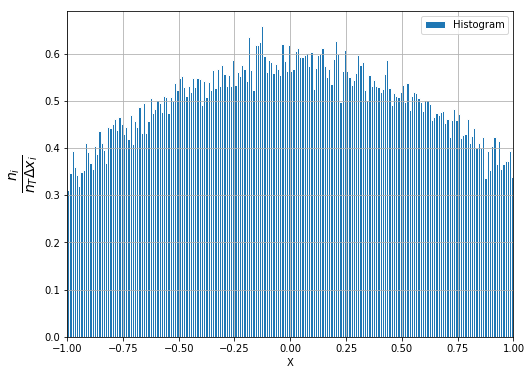

In [4]:
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.grid()
ax1.hist(data,bins = 200, normed = True, label="Histogram", ec='white') #plot the data in a histogram with 100 bin
ax1.set_xlabel("X")
ax1.set_ylabel(r"$\frac{n_i}{n_{T}\Delta x_i}$", fontsize=20)
ax1.set_xlim(-1,1)
ax1.legend()
plt.show()

In [5]:
mumin = -0.2
mumax = 0.2
mm = np.arange(mumin, mumax, 0.001)

L=[]
for m in mm:
        
    P = fgaussienne(data, m, 1,1)

    L.append(-np.sum(np.log(P)))

    

mubest = mm[np.where(L == np.min(L))[0]]
lstarmin=np.min(L)
lstarwitherr=lstarmin+0.5
ui=int(np.where(L==lstarmin)[0])
L1=L[:ui]
L2=L[ui+1:]
diff1=np.abs(L1-np.linspace(lstarwitherr,lstarwitherr,len(L1)))
diff2=np.abs(L2-np.linspace(lstarwitherr,lstarwitherr,len(L2)))
mubestless=mm[int(np.where(diff1==np.min(diff1))[0])]
mubestmore=mm[int(np.where(np.min(diff2))[0])+1+len(L1)]
print(mubestless,mubest,mubestmore)







1.66533453694e-16 [ 0.003] 0.004


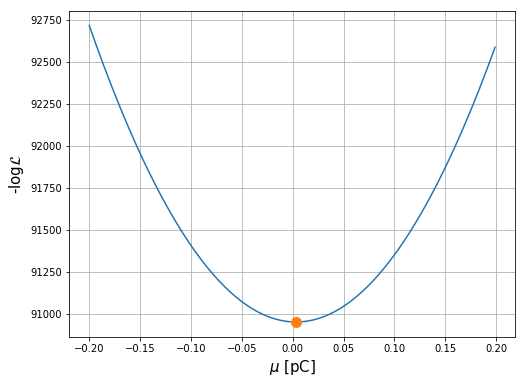

In [6]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
ax2.plot(mm, L)
ax2.set_xlabel(r"$\mu$ [pC]", fontsize=15)
ax2.set_ylabel("-$\log \mathcal{L}$", fontsize=15)
ax2.plot(mubest, np.min(L),'o', ms=10)

plt.show()

In [11]:
data = np.loadtxt("Desktop/Data_Thu_Feb_15_2018_at_16_50_57.txt")
data=0.1*data
datar=data[np.where((data >30) & (data < 120))]
len(data)

51587

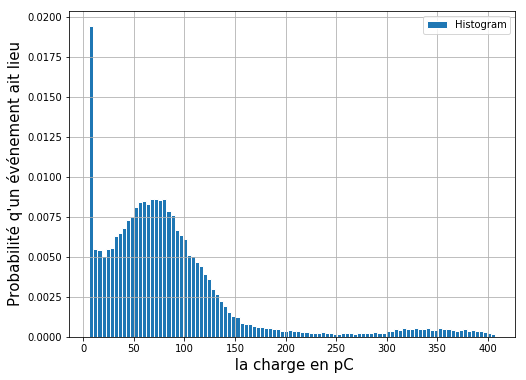

In [12]:
fig3, ax3 = plt.subplots(figsize=(8,6))
plt.grid()
ax3.hist(data,bins = 100, normed = True, label="Histogram", ec='white') #plot the data in a histogram with 100 bins
#xx=np.linspace(30,120,10000)
#yy=k*gaussienne(xx,76.3,21.5,1)
#ax3.plot(xx, yy, lw=4, label="Fonction gaussienne")
ax3.set_xlabel(" la charge en pC",fontsize=15)
ax3.set_ylabel("Probabilité q'un événement ait lieu", fontsize=15)
ax3.legend()
plt.savefig('graph11.png')
plt.show()

In [13]:
mumin = 70
mumax = 74
mm = np.arange(mumin, mumax, 0.1)

L=[]
for m in mm:
        
    P = fgaussienne(datar, m, 35,1)

    L.append(-np.sum(np.log(P)))

    

mubest = mm[np.where(L == np.min(L))[0]]
lstarmin=np.min(L)
lstarwitherr=lstarmin+0.5
ui=int(np.where(L==lstarmin)[0])
L1=L[:ui]
L2=L[ui+1:]
diff1=np.abs(L1-np.linspace(lstarwitherr,lstarwitherr,len(L1)))
diff2=np.abs(L2-np.linspace(lstarwitherr,lstarwitherr,len(L2)))
mubestless=mm[int(np.where(diff1==np.min(diff1))[0])]
mubestmore=mm[int(np.where(np.min(diff2))[0])+1+len(L1)]
print(mubestless,mubest,mubestmore)

72.0 [ 72.1] 72.2


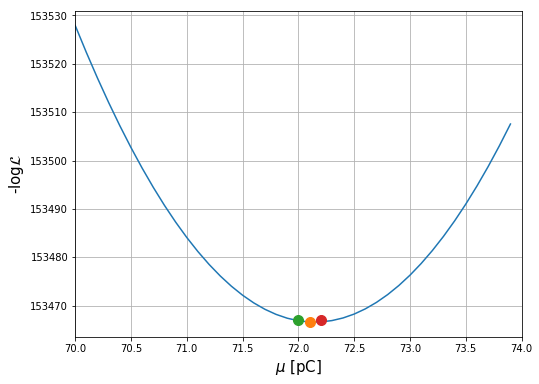

In [14]:
fig44, ax44 = plt.subplots(figsize=(8,6))
plt.grid()
ax44.plot(mm, L)
ax44.set_xlabel(r"$\mu$ [pC]", fontsize=15)
ax44.set_ylabel("-$\log \mathcal{L}$", fontsize=15)
ax44.plot(mubest, np.min(L),'o', ms=10)
ax44.plot(mubestless,lstarwitherr,'o', ms=10)
ax44.plot(mubestmore, lstarwitherr,'o', ms=10)
ax44.set_xlim(70,74)
plt.savefig('graph3.png')

plt.show()

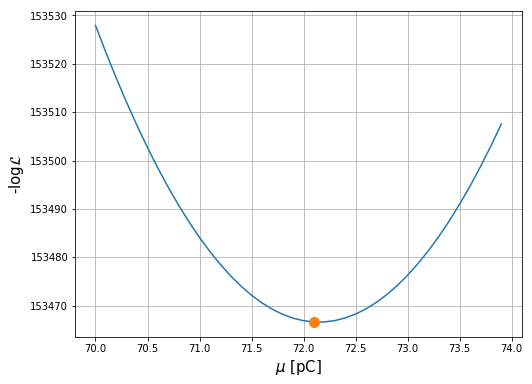

In [15]:
fig4, ax4 = plt.subplots(figsize=(8,6))
plt.grid()
ax4.plot(mm, L)
ax4.set_xlabel(r"$\mu$ [pC]", fontsize=15)
ax4.set_ylabel("-$\log \mathcal{L}$", fontsize=15)
ax4.plot(mubest, np.min(L),'o', ms=10)

plt.savefig('graph2.png')

plt.show()

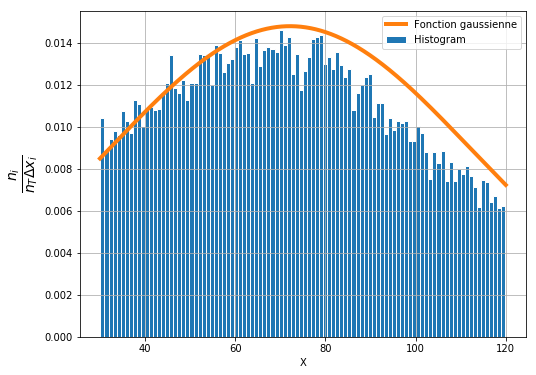

In [16]:
k=1/(norm.cdf(120,72.146,40)-norm.cdf(40,72.146,40))
fig5, ax5 = plt.subplots(figsize=(8,6))
plt.grid()
ax5.hist(datar,bins = 100, normed = True, label="Histogram", ec='white') #plot the data in a histogram with 100 bins
xx=np.linspace(30,120,10000)
yy=gaussienne(xx,72.146,40,k)
ax5.plot(xx, yy, lw=4, label="Fonction gaussienne")
ax5.set_xlabel("X")
ax5.set_ylabel(r"$\frac{n_i}{n_{T}\Delta x_i}$", fontsize=20)
ax5.legend()
plt.show()

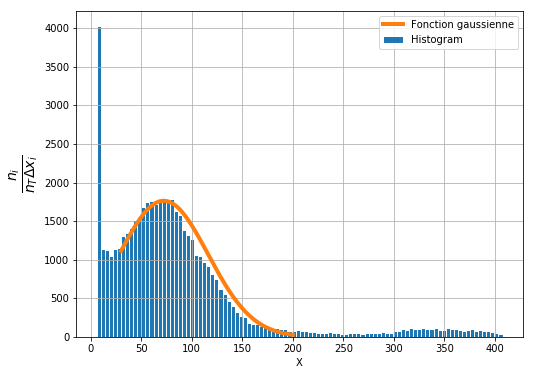

In [17]:
fig6, ax6 = plt.subplots(figsize=(8,6))
plt.grid()
c, bins, p = ax6.hist(data,bins = 100, normed = False, label="Histogram", ec='white') #plot the data in a histogram with 100 bins
deltax = np.diff(bins)[0]
xx=np.linspace(30,200,10000)
yy=len(datar)*deltax*gaussienne(xx,72.146,44,k)
ax6.plot(xx, yy, lw=4, label="Fonction gaussienne")
ax6.set_xlabel("X")
ax6.set_ylabel(r"$\frac{n_i}{n_{T}\Delta x_i}$", fontsize=20)
ax6.legend()
plt.savefig('graph4.png')
plt.show()

In [22]:
data2 = np.loadtxt("Desktop/quartzsignal_his.dat")
data2=0.1*data2
len(data2)


1000

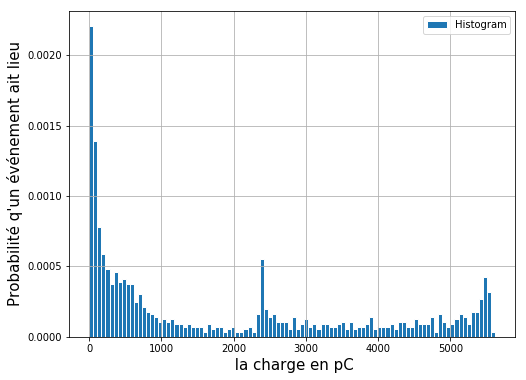

In [24]:
fig33, ax33 = plt.subplots(figsize=(8,6))
plt.grid()
ax33.hist(data2,bins = 100, normed = True, label="Histogram", ec='white') #plot the data in a histogram with 100 bins
#xx=np.linspace(30,120,10000)
#yy=k*gaussienne(xx,76.3,21.5,1)
#ax3.plot(xx, yy, lw=4, label="Fonction gaussienne")
ax33.set_xlabel(" la charge en pC",fontsize=15)
ax33.set_ylabel("Probabilité q'un événement ait lieu", fontsize=15)
ax33.legend()
plt.savefig('graph111.png')
plt.show()